In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import data
metadata_dir = '../metadata.csv'
metadata = pd.read_csv(metadata_dir)
# show columns names?
print(metadata.columns)

C:\Users\walsa\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\walsa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\walsa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'needed_supplemental_O2', 'extubated',
       'temperature', 'pO2_saturation', 'leukocyte_count', 'neutrophil_count',
       'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder',
       'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes',
       'Unnamed: 27'],
      dtype='object')


In [2]:
# head first 5 rows
metadata.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [3]:
metadata.shape

(360, 28)

In [4]:
metadata.finding.value_counts()

COVID-19          284
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
E.Coli              4
ARDS                4
No Finding          3
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64

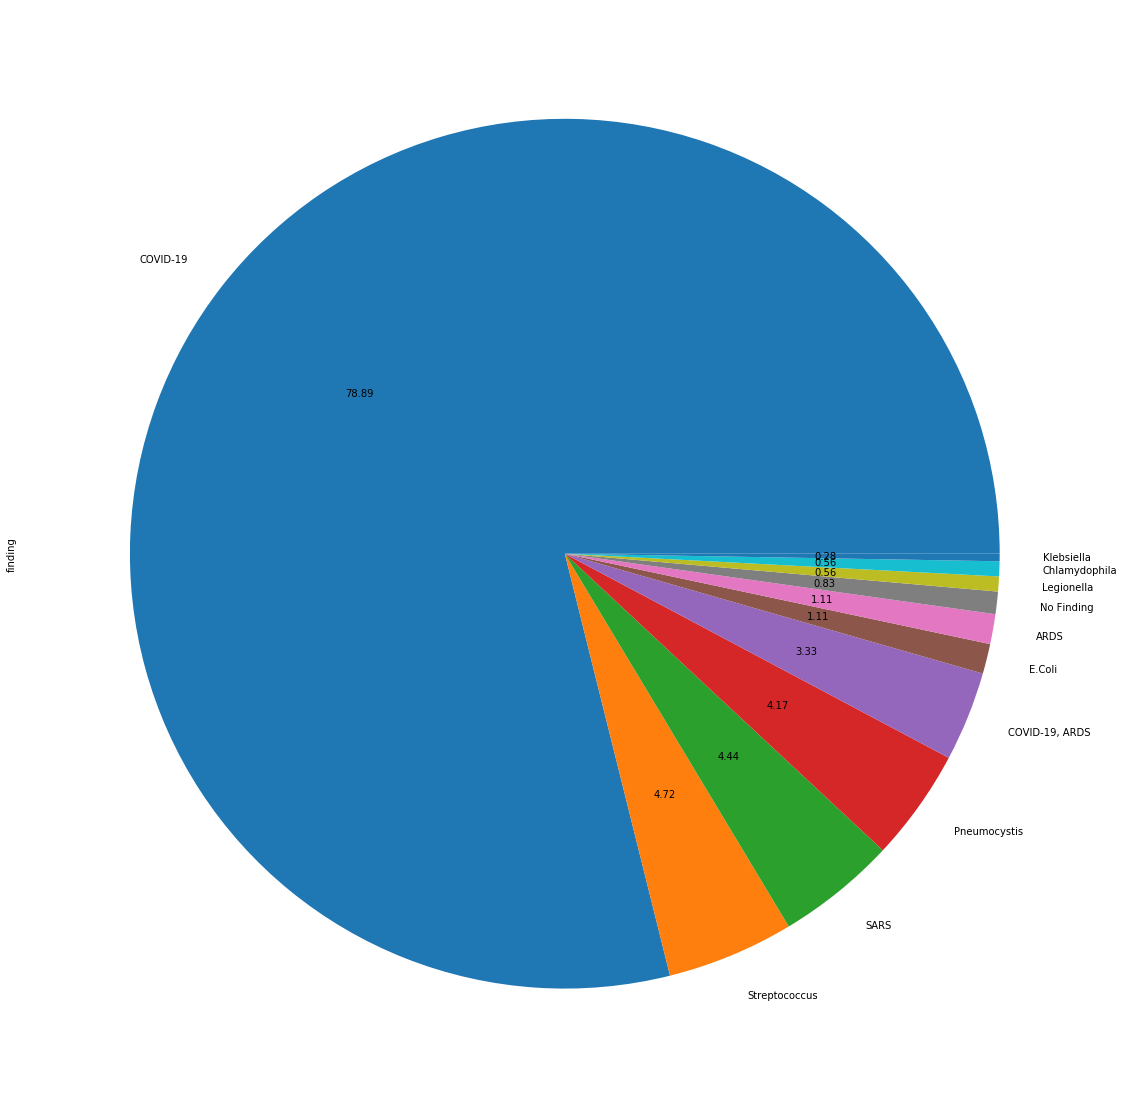

In [5]:
metadata.finding.value_counts().plot(kind="pie",figsize = (30,20),autopct='%.2f')

In [6]:
metadata.survival.value_counts().sum()

109

In [7]:
metadata["survival"].fillna("unknown", inplace = True) 

In [8]:
metadata.survival.value_counts().sum()

360

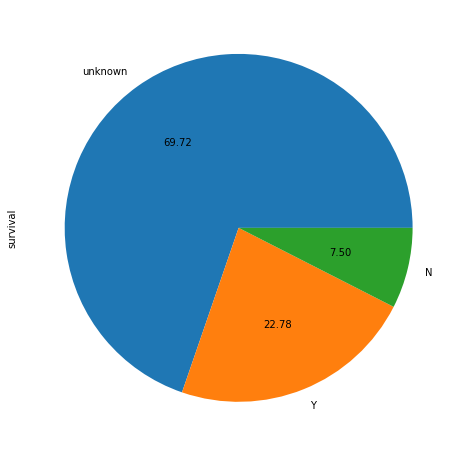

In [9]:
metadata.survival.value_counts().plot(kind="pie",figsize = (8,8),autopct='%.2f')

In [11]:
metadata.view.value_counts()

PA               208
AP                42
Axial             41
AP Supine         38
L                 27
Coronal            3
AP semi erect      1
Name: view, dtype: int64

In [12]:
x_raydata = metadata[metadata.view == 'PA']


In [13]:
x_raydata.finding.value_counts()

COVID-19          145
SARS               16
Pneumocystis       13
Streptococcus      13
COVID-19, ARDS     11
ARDS                4
No Finding          2
Legionella          2
Chlamydophila       1
Klebsiella          1
Name: finding, dtype: int64

In [13]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "COVID-19" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../covid' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [13]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "Streptococcus" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../Streptococcus' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [14]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "SARS" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../SARS' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [15]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "Pneumocystis" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../Pneumocystis' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [16]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "COVID-19, ARDS" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../COVID-19_ARDS' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [17]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "ARDS" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../ARDS' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [18]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "Legionella" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../Legionella' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)

In [19]:
'''
This code finds all images of patients of a specified VIRUS and X-Ray view and stores selected image to an OUTPUT directory
+ It uses metadata.csv for searching and retrieving images name
+ Using ./images folder it selects the retrieved images and copies them in output folder
Code can be modified for any combination of selection of images
'''

import pandas as pd
import shutil
import os

# Selecting all combination of 'COVID-19' patients with 'PA' X-Ray view
virus = "No Finding" # Virus to look for
x_ray_view = "PA" # View of X-Ray

metadata = "../metadata.csv" # Meta info
imageDir = "../images" # Directory of images
outputDir = '../No Finding' # Output directory to store selected images

metadata_csv = pd.read_csv(metadata)

# loop over the rows of the COVID-19 data frame
for (i, row) in metadata_csv.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)